<a href="https://colab.research.google.com/github/puginarug/Image_Analysis_Course_71254/blob/main/Image__Analysis_Course_Notes_David_Zingerman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# note - no need to run this notebook, its just a collection of code and text from the course (and my own notes)

# Liabraries

In [ ]:
# main libs used in the course:
import skimage as io #scikit-image
import cv2 #opencv
import numpy as np #for working with arrays

# more:
# ENVI (mainly used for satelite images)
# Pyclesperanto (segment based on Voronoi+Otsu)
# tensorflow (machine learning by google)

# Basic Tools (and Useful Code)

## Reading and Downloading Images

In [ ]:
# read & display image using SKIMAGE
image = skimage.io.imread(fname=f"{folder_path}/images/parrot.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(image)

NameError: ignored

In [ ]:
# read & display image using OPENCV

# Importing cv2
import cv2 
from google.colab.patches import cv2_imshow

# Reading the image using imread() function
image = cv2.imread(f"{folder_path}/images/mouse_liver.jpg") # image is read as BGR
  
# Displaying the original image
cv2_imshow(image) # opencv displays the image as RGB
print('Staining of mouse liver sections showing steatosis of the liver (fatty liver),\nwith accumulation of fat, lipid droplets (in red), within cells.\nCell nuclei stain blue (C. Maíllo, IRB Barcelona).')
print('Source: https://www.irbbarcelona.org/en/news/a-protein-that-protects-against-fatty-liver')

NameError: ignored

In [ ]:
# displaying all images in a folder side by side:

from skimage import img_as_float

def imshow_all(images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap = 'gray')
        ax.set_title(label)

In [ ]:
# downloading images from URL

def downloadImageFromURL (url='', destination_image_path=''):

  # The method will take in two parameters, the url variable you created earlier, and stream: True.
  # by adding this second argument in guarantees no interruptions will occur when the method is running.
  res = requests.get(url, stream = True) 

  if res.status_code == 200:
      with open(destination_image_path,'wb') as f:
          shutil.copyfileobj(res.raw, f)
      print('Image sucessfully Downloaded: ', destination_image_path)
  else:
      print('Image Couldn\'t be retrieved')

In [ ]:
#exmaple

images_path = '/content/drive/MyDrive/71254_2023/02_Assignment_Submission/David.Zingerman/downloaded_images'

url_mondial = 'https://www.holidaytourstravel.com/wp-content/uploads/2022/05/FIFA-World-Cup-2022-1-scaled.jpg'

path_to_save_image = f'{images_path}/mondial.jpg'

downloadImageFromURL(url_mondial, path_to_save_image)

In [ ]:
mondial_image = io.imread(path_to_save_image)

plt.imshow(mondial_image)

In [ ]:
# convert to grayscale and display
gray_image = skimage.color.rgb2gray(image)

In [ ]:
# convert to 8-bit
8_bit_img = img_as_ubyte(img)

### Reading multiple images from a folder using glob

 - The glob module finds all the path names
 - The glob.glob returns the list of files with their full path 

#### Libs and glob

In [ ]:
# our working folder
folder_path = '/content/drive/MyDrive/71254_2023/01_Lectures/Class02'

In [ ]:
# import libs
import glob
import skimage.io as io

In [ ]:
# load file paths from chosen folder into a list
path_list = glob.glob(f'{folder_path}/images/*.*') #Rerurns a list of file names
print(path_list)  #Prints the list containing file names

#### Iterate over the path list and read the images into an image list

In [ ]:
#Now let us load each file at a time...
image_list=[]  # Empty list to store images from the folder.
path = "images/test_images/*.*"
for path in path_list:   #Iterate through each file in the list using for
    print(path)     # just stop here to see all file names printed
    img = io.imread(path)  # now, we can read each file since we have the full path
    image_list.append(img)  #C reate a list of images (not just file names but full images)

#### Displaying one of the images

In [ ]:
# Displaying one of the images from the stored list

from matplotlib import pyplot as plt
plt.imshow(image_list[2])  #View the 3rd image in the list.

#### Example
 - Read all the **red** channels of all the images from ../Class02/images into a list.
 - Display all the images in the same colormap you choose.

In [ ]:
red_list = [i[:,:,0] for i in image_list]
im_index = 1

plt.figure(figsize=(15,15))
for image in red_list:
  plt.subplot(len(red_list),len(red_list) , im_index)
  plt.imshow(image, cmap='summer')
  im_index += 1

## Figures

#### Basic **Histogram**

In [ ]:
# basic histogram
img = (img.copy())
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

#### **Histogram** Using OpenCV:






**What is a histogram?**
So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just **another way of understanding the image.** By looking at the histogram of an image, you get intuition about contrast, brightness and intensity distribution of that image.

This is the **function** to find the histogram:

       hist = cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

Let's familiarize with the function and its parameters :


1.   **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
2.   **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
3. **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
4. **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
5. **ranges** : this is our RANGE. Normally, it is [0,256]. (the hist and accumalte inside the ranges, enables to compute a single histogram from several sets of arrays.)


##### **One channel:**


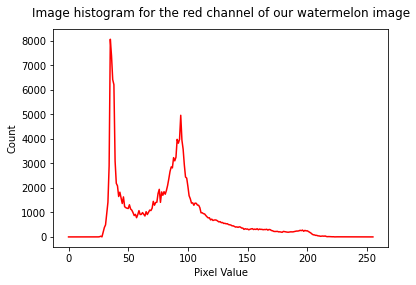

In [ ]:
# computing the histogram of the red channel of our watermelon image
img = img_list[0].copy()
hist = cv2.calcHist([img],[0],None,[256],[0,256]) # our image, first channel(0=red), no mask, 256 bins, range 0-255
  
# plot the above computed histogram
plt.plot(hist, color='r') # red color for the line
plt.title('Image histogram for the red channel of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

In [ ]:
# plotting different pixels using envi (usually when working with hyperspectral images)

def plot_several_pixel(img,pixels_tuples_array,bands):
  for pixel_xy in pixels_tuples_array:
    leaf_pixel = img[ 
      pixel_xy[1]:pixel_xy[1]+1, #y pixel
      pixel_xy[1]:pixel_xy[1]+1, #x pixel
      :]
    leaf_pixel_squeezed = np.squeeze(leaf_pixel) #squeeze

    plt.plot(bands, leaf_pixel_squeezed, label =f"x={pixel_xy[1]}, y={pixel_xy[1]}"  )
  plt.title('Spectral signature',fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.legend()
  plt.show()

##### **Multiple channels:**


#### Showin images in row

In [ ]:
from skimage import img_as_float

def imshow_all(images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap = 'gray')
        ax.set_title(label)


## Image Normalization

In [ ]:
# Normaliztion of an image - critical before calculating index

b,g,r= cv2.split(img) # split the images into channels
np.seterr(invalid='ignore') # ignore 0/0 when dividing

# function to normalize each channel
def normalize(img):
  return (img - np.min(img)) / (np.max(img) - np.min(img))

# you can also use img_as_float - uncomment to check
# from skimage.util import img_as_float
# image = img_as_float(img)

r,g,b = normalize(r), normalize(g), normalize(b) # normalizing all channels

# Filters (Week 4)

## Mean Filter

In [ ]:
# applying a mean filter

import scipy.ndimage as ndi

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img_gray = rgb2gray(mondial_image)

img_gray_mean = ndi.correlate(img_gray, mean_kernel)

io.imshow(img_gray_mean)

#### Mean filter on a real image

Now we can apply the filter to this downsampled image:

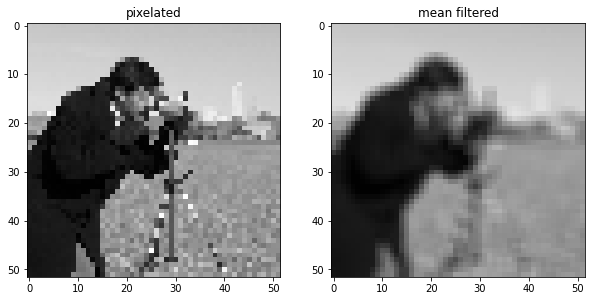

In [ ]:
filtered = ndi.correlate(pixelated, mean_kernel)
imshow_all([pixelated, filtered], titles=['pixelated', 'mean filtered'])

Comparing the filtered image to the pixelated image, we can see that this filtered result is smoother: Sharp edges (which are just borders between dark and bright pixels) are smoothed because dark pixels reduce the intensity of neighboring pixels and bright pixels do the opposite.

## Gaussian filter

The classic image filter is the Gaussian filter. This is similar to the mean filter, in that it tends to smooth images. The Gaussian filter, however, doesn't weight all values in the neighborhood equally. Instead, pixels closer to the center are weighted more than those farther away.

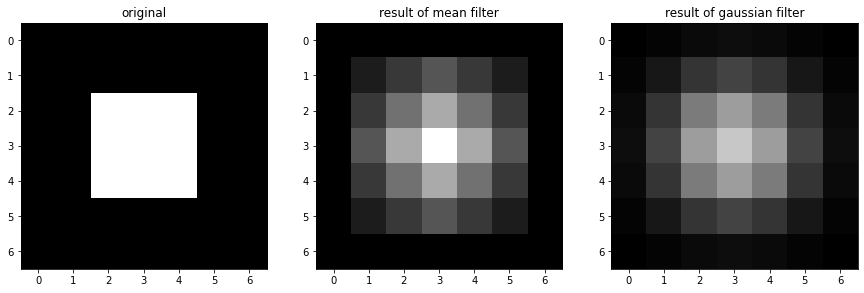

In [ ]:
from skimage import filters

smooth_mean = ndi.correlate(bright_square, mean_kernel) # from above

sigma = 1 # for the gaussian filter
smooth = filters.gaussian(bright_square, sigma)

# displaying the images
imshow_all([bright_square, smooth_mean, smooth],
           titles=['original', 'result of mean filter', 'result of gaussian filter'])

For the Gaussian filter, `sigma`, the standard deviation, defines the size of the neighborhood.

For a real image, we get the following:

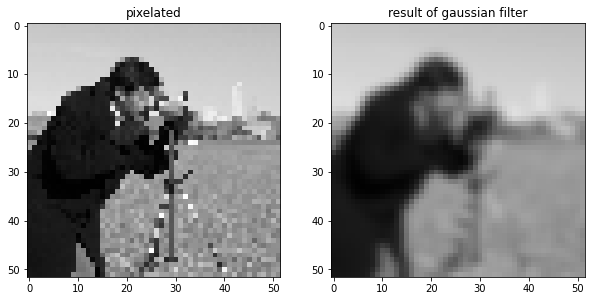

In [ ]:
from skimage import img_as_float
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.

pixelated_float = img_as_float(pixelated)
smooth = filters.gaussian(pixelated_float, sigma=1)
imshow_all([pixelated_float, smooth],titles=['pixelated', 'result of gaussian filter'])

This doesn't look drastically different than the mean filter, but the Gaussian filter is typically preferred because of the distance-dependent weighting, and because it does not have any sharp transitions. For a more detailed image and a larger filter, you can see artifacts in the mean filter since it doesn't take distance into account:

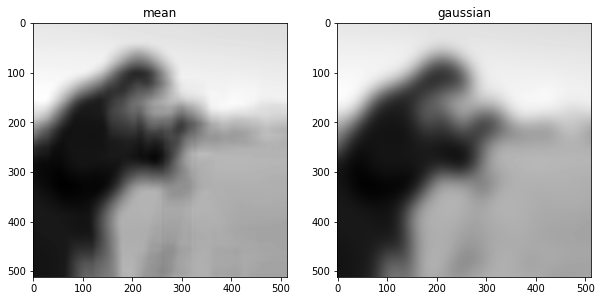

In [ ]:
size = 20
structuring_element = np.ones((3*size, 3*size))

smooth_mean = filters.rank.mean(image, structuring_element) # mean filter 
smooth_gaussian = filters.gaussian(image, size) # gaussian filter
titles = ['mean', 'gaussian']
imshow_all([smooth_mean, smooth_gaussian], titles=titles)

(Above, we've tweaked the size of the structuring element used for the mean filter and the standard deviation of the Gaussian filter to produce an approximately equal amount of smoothing in the two results.)

Incidentally, for reference, let's have a look at what the Gaussian filter actually looks like. Technically, the value of the kernel at a pixel that is $r$ rows and $c$ cols from the center is:

$$
k_{r, c} = \frac{1}{2\pi \sigma^2} \exp{\left(-\frac{r^2 + c^2}{2\sigma^2}\right)}
$$

In [ ]:
# function to download an image from a url

import requests # lib to request image from web
import shutil # lib to save the image locally


def downloadImageFromURL (url='', destination_image_path=''):

  # The method will take in two parameters, the url variable you created earlier, and stream: True.
  # by adding this second argument in guarantees no interruptions will occur when the method is running.
  res = requests.get(url, stream = True) 

  if res.status_code == 200:
      with open(destination_image_path,'wb') as f:
          shutil.copyfileobj(res.raw, f)
      print('Image sucessfully Downloaded: ', destination_image_path)
  else:
      print('Image Couldn\'t be retrieved')

In [ ]:
 # imports libs
import cv2
import skimage
from skimage import io, img_as_float

# downloading an image with salt and pepper noise
image_url = 'http://www.fit.vutbr.cz/~vasicek/imagedb/img_corrupted/impnoise_005/106020.png'
image_path_spnoise = '/content/salt_and_pepper.jpg'
downloadImageFromURL(image_url, image_path_spnoise)

# downloading an image with salt and pepper noise
image_url = 'https://media.geeksforgeeks.org/wp-content/uploads/20200703163814/noise1.png'
image_path_gausnoise = '/content/gaus_noise.jpg'
downloadImageFromURL(image_url, image_path_gausnoise)

Image sucessfully Downloaded:  /content/salt_and_pepper.jpg
Image sucessfully Downloaded:  /content/gaus_noise.jpg


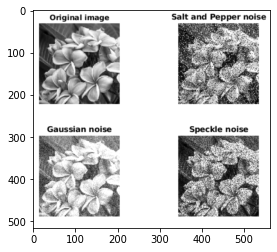

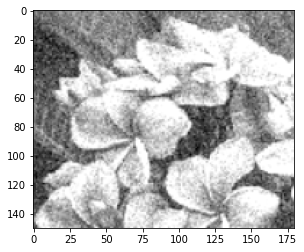

In [ ]:
# reading and displaying our images
img_gaussian_noise = img_as_float(io.imread(image_path_gausnoise, as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread(image_path_spnoise, as_gray=True))

# display the gaus noise
plt.imshow(img_gaussian_noise, cmap='gray')
plt.show()

# cropping the bottom left image, and displaying
cropped_img_gaussian_noise = (img_gaussian_noise.copy())[300:450,20:200]
plt.imshow(cropped_img_gaussian_noise, cmap='gray')
plt.show()

In [ ]:
# lets apply the gaussian filter
img = cropped_img_gaussian_noise.copy()

# using OpenCV
# agruments: image, kernel size, sigma values, border type (padding, etc.)
# cv2.BORDER_CONSTANT adds a constant color border
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT) 

# using skimage
# sigma defines the std dev of the gaussian kernel
# cval is a value to fill past edges of input if mode is ‘constant’. Default is 0.0
gaussian_using_skimage = skimage.filters.gaussian(img, sigma=1, mode='constant', cval=0.0)

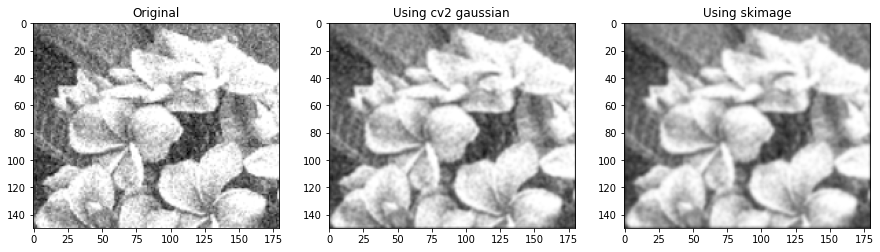

In [ ]:
# displaying the filtered images
imshow_all([img, gaussian_using_cv2, gaussian_using_skimage],
           ['Original', 'Using cv2 gaussian', 'Using skimage'])

**Key Points:**
*   Applying a low-pass blurring filter smooths edges and removes noise from an image.

*   Blurring is often used as a first step before we perform thresholding or edge detection.

*   The Gaussian blur can be applied to an image with the skimage.filters.gaussian() function.

*   Larger sigma values may remove more noise, but they will also remove detail from an image.

Credit: https://datacarpentry.org


**This animation shows how the blur kernel moves along in the original image in order to calculate the colour channel values for the blurred image.**

![Image](https://datacarpentry.org/image-processing/fig/blur-demo.gif)

##### **TODO:** Read in an image from a URL using the requests library, and apply a guassian filter.

Try running the code  with a range of smaller and larger sigma values. Generally speaking, what effect does the sigma value have on the blurred image?

*Write your answer in code cells under this text cell.*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """


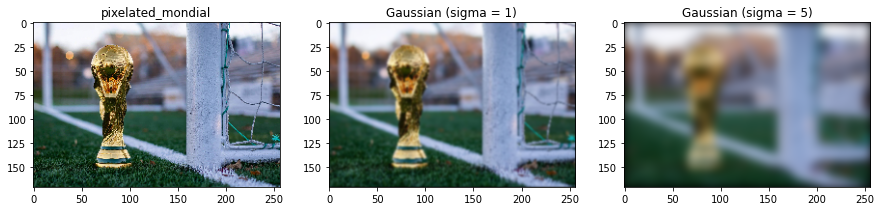

In [ ]:
pixelated_mondial = mondial_image[0::10, 0::10]

gaussian_mondial_s1 = skimage.filters.gaussian(pixelated_mondial, sigma=1, mode='constant', cval=0.0)

gaussian_mondial_s5 = skimage.filters.gaussian(pixelated_mondial, sigma=5, mode='constant', cval=0.0)

imshow_all([pixelated_mondial, gaussian_mondial_s1, gaussian_mondial_s5],
           ['pixelated_mondial', 'Gaussian (sigma = 1)', 'Gaussian (sigma = 5)'])

# seems the sigma value is proportianal to the degree to which the picture is getting blurred.

## Unsharp Mask


Unsharp mask **enhances edges by subtracting an unsharp (smoothed) version** of the image from the original.
Effectively making the filter a high pass filter. 

*enhanced image = original + amount * (original - blurred)*

**Amount of sharpening** can be controlled via scaling factor, a multiplication factor
for the sharpened signal. 

**skimage** uses Gaussian smoothing for image blurring therefore the radius parameter in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

Image sucessfully Downloaded:  /content/blured_tree.jpg


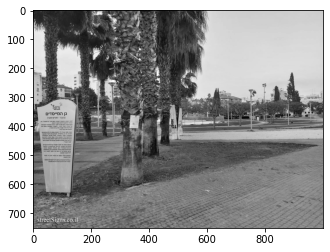

In [ ]:
# Credit: Python for Microscopists, Sreenivas Bhattiprolu"
# This code shows that unsharp is nothing but original + amount *(original-blurred)

# import libs
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

# download a blured image from the web
image_url = 'https://www.streetsigns.co.il/Images/extra/c4261.jpg'
image_path_tree = '/content/blured_tree.jpg'
downloadImageFromURL(image_url, image_path_tree)

# read in the image and display
img = img_as_float(io.imread(image_path_tree, as_gray=True))
plt.imshow(img, cmap = 'gray')

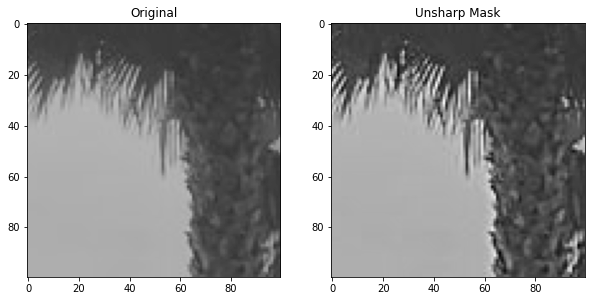

In [ ]:
# applying the Unsharp Mask
gaussian_img = gaussian(img, sigma=2, mode='constant', cval=0.0) # creating our blured version

# enhanced image = original + amount * (original - blurred)
enhanced_image = img + (img - gaussian_img)*1.

# displaying the filtered images
imshow_all([img[100:200,100:200], enhanced_image[100:200,100:200]],
           ['Original', 'Unsharp Mask'])

## Basic edge filtering

For images, edges are boundaries between light and dark values. The detection of edges can be useful on its own, or it can be used as preliminary step in other algorithms (which we'll see later).

##### Difference filters in 2D

For images, you can think of an edge as points where the gradient is large in one direction. We can approximate gradients with difference filters.

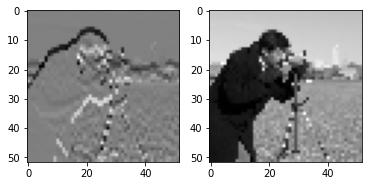

In [ ]:
# lets create a vertical kernel
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

# convolve our above image
gradient_vertical = ndi.correlate(pixelated.astype(float),
                                  vertical_kernel)
# display
fig, ax = plt.subplots(1, 2)
ax[0].imshow(gradient_vertical, cmap='gray')
ax[1].imshow(pixelated, cmap='gray')

##### **TODO:** 

- Add a horizontal kernel to the above example to also compute the horizontal gradient, $g_y$
- Compute the magnitude of the image gradient at each point: $\left|g\right| = \sqrt{g_x^2 + g_y^2}$

*Write your answer in code cells under this text cell.*

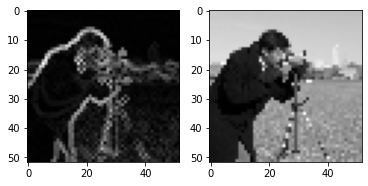

In [ ]:
from scipy.sparse.linalg.isolve.minres import sqrt
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

horizontal_kernel = np.transpose(vertical_kernel)

# convolve our above image
gradient_vertical = ndi.correlate(pixelated.astype(float),
                                  vertical_kernel)

gradient_horizontal = ndi.correlate(pixelated.astype(float),
                                  horizontal_kernel)

gradient_magnitude = sqrt((gradient_vertical**2)+(gradient_horizontal**2))

# display
fig, ax = plt.subplots(1, 2)
ax[0].imshow(gradient_magnitude, cmap='gray')
ax[1].imshow(pixelated, cmap='gray')

#### **Sobel edge filter**



The Sobel filter, the most commonly used edge filter, should look pretty similar to what you developed above. Take a look at the vertical and horizontal components of the Sobel kernel to see how they differ from your earlier implementation:

* http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_v
* http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.sobel_h

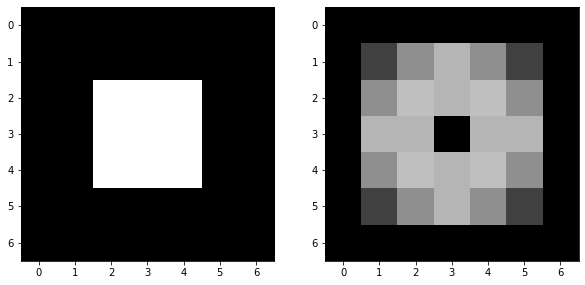

In [ ]:
imshow_all([bright_square, filters.sobel(bright_square)])

Notice that the size of the output matches the input, and the edges aren't preferentially shifted to a corner of the image. Furthermore, the weights used in the Sobel filter produce diagonal edges with reponses that are comparable to horizontal or vertical edges.

Like any derivative, noise can have a strong impact on the result:

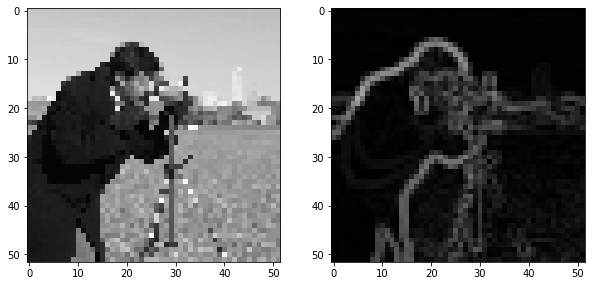

In [ ]:
# see what happens when we apply sobel to a noisy image
pixelated_gradient = filters.sobel(pixelated)
imshow_all([pixelated, pixelated_gradient])

Smoothing is often used as a preprocessing step in preparation for feature detection and image-enhancement operations because sharp features can distort results.

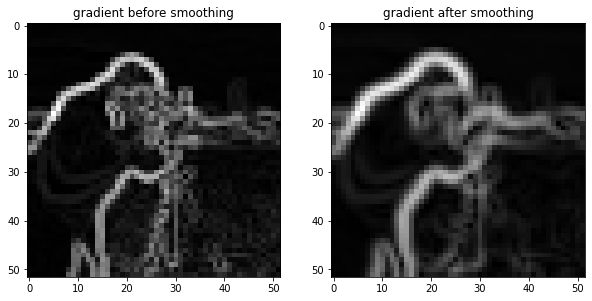

In [ ]:
# applying the sobel after smoothing

gradient = filters.sobel(smooth) # applying sobel to our above smoothed version
titles = ['gradient before smoothing', 'gradient after smoothing']

# Scale smoothed gradient up so they're of comparable brightness.
imshow_all([pixelated_gradient, gradient*1.8], titles=titles)

## Canny Edge Detector

**The Process of Canny edge detection algorithm can be broken down to 5 different steps:**
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that
are weak and not connected to strong edges.

Image sucessfully Downloaded:  /content/cow.jpg


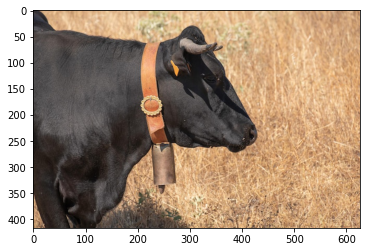

In [ ]:
# import libs
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np

# download an image from the web
image_url = 'https://img.freepik.com/premium-photo/black-cow-grazes-with-many-flies-head-pastures-extremadura-eating-grass-acorns_302440-1499.jpg'
image_path_cow = '/content/cow.jpg'
downloadImageFromURL(image_url, image_path_cow)

# read in the image and display
img = io.imread(image_path_cow, as_gray=False)
plt.imshow(img)

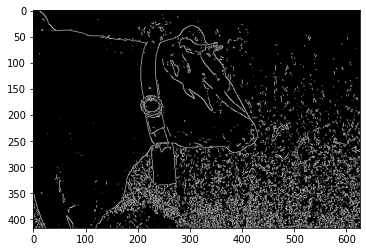

In [ ]:
# Applying Canny
canny_edge = cv2.Canny(img, 195, 200)  
#Supply Thresholds 1 and 2, make sure the thresholds suit the image depth value

plt.imshow(canny_edge, cmap = 'gray')

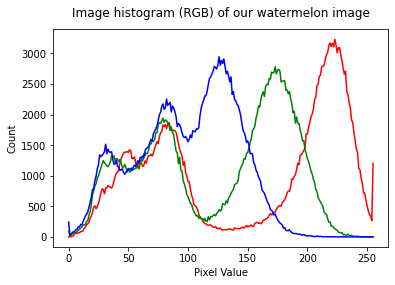

In [ ]:
# tricky, lets see the histogram
# computing the histogram of all channels of our image
img = (img.copy())
  
# plot the above computed histogram
colors = ('r','g','b') # for the line color

for i,color in enumerate(colors):
  hist = cv2.calcHist([img],[i],None,[256],[0,256]) # our image, channel(0/1/2), no mask, 256 bins, range 0-255
  plt.plot(hist, color = color) # r/g/b color for each line
plt.title('Image histogram (RGB) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()



**Automated Thresholding for cv2.Canny()?**

Can you find an optimal set of threshold values? Yes, but it doesn't always work. You can make your own calculation for some good value, and then adjust the range with a sigma around that threshold.

Read more here at home: https://stackabuse.com/opencv-edge-detection-in-python-with-cv2canny/

##### **TODO:** 

Read in an image, and apply canny. Which thresholds did you use?

*Write your answer in code cells under this text cell.*

Image sucessfully Downloaded:  /content/batshuayi.jpg


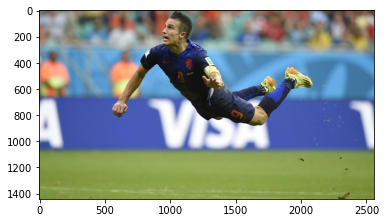

In [ ]:
# download an image from the web
image_url = 'https://i.eurosport.com/2014/06/14/1257363-27138795-2560-1440.jpg'
image_path_batshuayi = '/content/batshuayi.jpg'
downloadImageFromURL(image_url, image_path_batshuayi)

# read in the image and display
img = io.imread(image_path_batshuayi, as_gray=False)
plt.imshow(img)

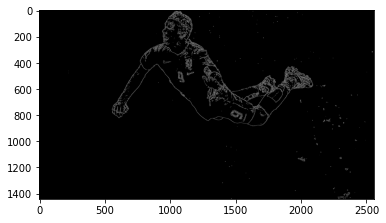

In [ ]:
# Applying Canny
canny_edge = cv2.Canny(img, 105, 120) #using 100-120 threshold
#Supply Thresholds 1 and 2, make sure the thresholds suit the image depth value

plt.imshow(canny_edge, cmap = 'gray')

## Denoising filters

At this point, we make a distinction. The earlier filters were implemented as a *linear dot-product* of values in the filter kernel and values in the image. The following kernels implement an *arbitrary* function of the local image neighborhood. Denoising filters in particular are filters that preserve the sharpness of edges in the image.

As you can see from our earlier examples, mean and Gaussian filters smooth an image rather uniformly, including the edges of objects in an image. When denoising, however, you typically want to preserve features and just remove noise. **The distinction between noise and features can, of course, be highly situation-dependent and subjective.**

#### Median Filter

The median filter is the classic edge-preserving filter. As the name implies, this filter takes a set of pixels (i.e. the pixels within a kernel or "structuring element") and returns the median value within that neighborhood. Because regions near a sharp edge will have many dark values and many light values (but few values in between) the median at an edge will most likely be either light or dark, rather than some value in between. In that way, we don't end up with edges that are smoothed.

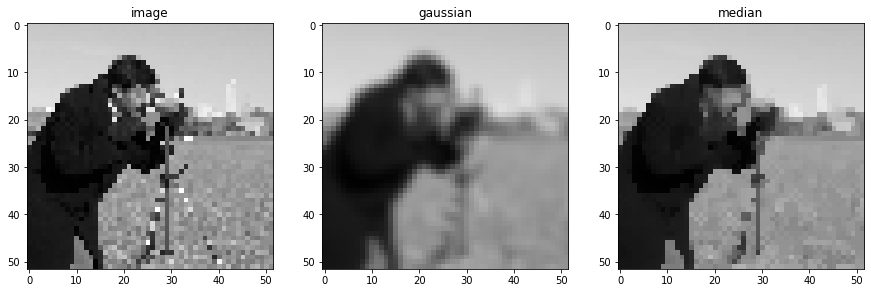

In [ ]:
# example comparing gaussian and median

#Disk creates a circular structuring element, similar to a mask with specific radius
from skimage.morphology import disk
neighborhood = disk(radius=1)  # "structuring element", matrix of ones though corners are zeroes

median = filters.rank.median(pixelated, neighborhood) # applying the median filter, needs 8 bit, not float.

#displaying
titles = ['image', 'gaussian', 'median']
imshow_all([pixelated, smooth, median], titles=titles)

This difference is more noticeable with a more detailed image.

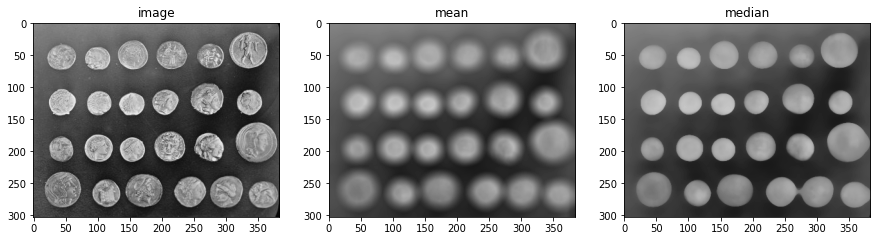

In [ ]:
# larger area
neighborhood = disk(10)

# get an image
coins = data.coins()

#calc the mean and median filters
mean_coin = filters.rank.mean(coins, neighborhood)
median_coin = filters.rank.median(coins, neighborhood)

#display
titles = ['image', 'mean', 'median']
imshow_all([coins, mean_coin, median_coin], titles=titles)

Notice how the edges of coins are preserved after using the median filter.

#### Bilateral Filter

Bilateral is slow and not very efficient at salt and pepper

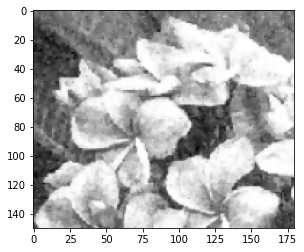

In [ ]:
# using cv2
import cv2
from skimage import img_as_ubyte

img = cropped_img_gaussian_noise.copy()
img = img_as_ubyte(cropped_img_gaussian_noise)


# d - diameter of each pixel neighborhood used during filtering
# sigmaCOlor - Sigma of grey/color space. 
# sigmaSpace - Large value means farther pixels influence each other (as long as the colors are close enough)
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)

plt.imshow(bilateral_using_cv2, cmap='gray')

#### Non-local means (NLM) filter

Works well for random gaussian noise but not as good for salt and pepper

The non-local means algorithm replaces the value of a pixel by an average 
of a selection of other pixels values: small patches centered on the other 
pixels are compared to the patch centered on the pixel of interest, and the 
average is performed only for pixels that have patches close to the current patch. 

Read more: https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/Buades-NonLocal.pdf

##### **TODO:** 

Read in two images. One with gaussian noise, and one with salt and pepper noise. Apply NLM filter to both and display. Make sure your declare the paths correctly.

*Write your answer in code cells under this text cell.*

Image sucessfully Downloaded:  /content/dogo.jpg
Image sucessfully Downloaded:  /content/penguin.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: Image dtype is not float. By default denoise_nl_means will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.19 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Image dtype is not float. By default denoise_nl_means will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.19 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.


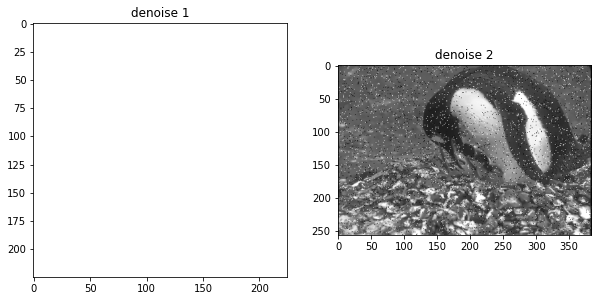

In [ ]:
# import libs
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

dogo_img_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQg0GRrDMwWMMTIf3glwbi0-uqhhReJAJF_eFHsmyrgnAQhHn1Xg_61X02t3oY45Yb4TMI&usqp=CAU'
penguin_img_url = 'http://www.fit.vutbr.cz/~vasicek/imagedb/img_corrupted/impnoise_005/106020.png'

image_path_dogo = '/content/dogo.jpg'
downloadImageFromURL(dogo_img_url, image_path_dogo)

image_path_penguin = '/content/penguin.jpg'
downloadImageFromURL(penguin_img_url, image_path_penguin)

# read in your images here - change the paths
img_gaussian_noise = img_as_float(io.imread(image_path_dogo, as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread(image_path_penguin, as_gray=True))

img1 = io.imread(image_path_dogo, as_gray=False)
img2 = io.imread(image_path_penguin, as_gray=False)

"""
The estimate_sigma function can provide a good starting point for setting 
the h (and optionally, sigma) parameters for the non-local means algorithm. 
h is a constant that controls the decay in patch weights as a function of the distance between patches. 
Larger h allows more smoothing between disimilar patches.
When the fast_mode argument is False, a spatial Gaussian weighting is applied 
to the patches when computing patch distances. When fast_mode is True a 
faster algorithm employing uniform spatial weighting on the patches is applied.
"""

### THIS IS THE CODE FOR THE NLM - change the 'img' to your images
sigma_est1 = np.mean(estimate_sigma(img1, multichannel=True))
sigma_est2 = np.mean(estimate_sigma(img2, multichannel=True))

denoise_img1 = denoise_nl_means(img1, h=1.15 * sigma_est1, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)

denoise_img2 = denoise_nl_means(img2, h=1.15 * sigma_est2, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)
### UNTIL HERE

#display your images
imshow_all([denoise_img1, denoise_img2], titles=['denoise 1', 'denoise 2'])



#### Total variation filter (TVF)

Works well for random gaussian noise but not as good for salt and pepper


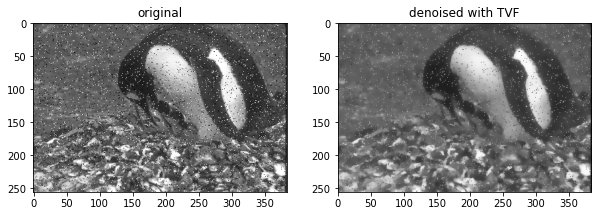

In [ ]:
# source: https://hal.archives-ouvertes.fr/hal-00437581/document

import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

# read in your image with noise
img = img_as_float(io.imread('/content/salt_and_pepper.jpg', as_gray=True))

"""
denoise_tv_chambolle(image, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
weight: The greater weight, the more denoising (at the expense of fidelity to input).
eps: Relative difference of the value of the cost function that determines the stop criterion. 
n_iter_max: Max number of iterations used for optimization
"""

# applying the filter
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)

#display
titles = ['original', 'denoised with TVF', '']
imshow_all([img, denoise_img], titles=titles)

##### **TODO:** 

Compare the histograms of the original image, and the TVFed image. What do you see?

*Write your answer in code cells under this text cell.*

Text(0.5, 1.03, 'Original Image Histogram')

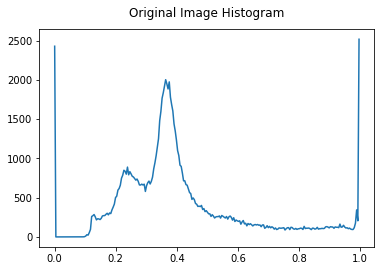

In [ ]:
# computing the histogram
img = (img.copy())
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

plt.title('Original Image Histogram', y=1.03)

Text(0.5, 1.03, 'Denoised Image Histogram')

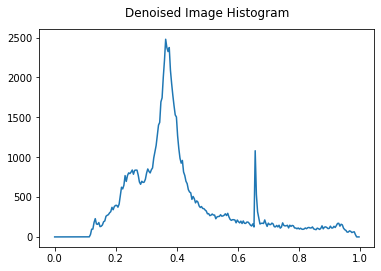

In [ ]:
denoise_img = (denoise_img.copy())
histogram, bin_edges = np.histogram(denoise_img, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

plt.title('Denoised Image Histogram', y=1.03)

it can be seen that after denoising there are no picks at the egdes of the histogram.

# Segmentation (Starting at Week 5)

### Histogram based thresholding

Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. Most frequently, we use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

In this BONUS section, we will learn how to use skimage functions to perform thresholding. Then, we will use the masks returned by these functions to select the parts of an image we are interested in.

Credit, [here](https://datacarpentry.org/image-processing/07-thresholding/).

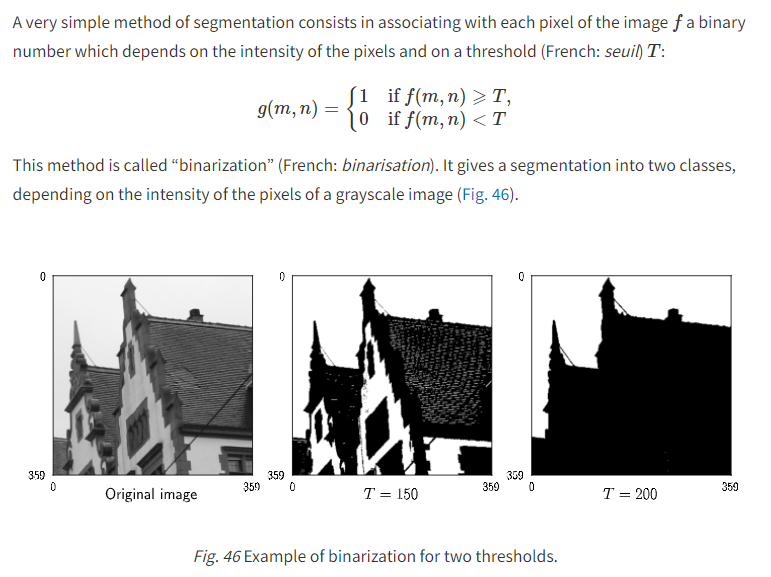

Credit, [here](https://vincmazet.github.io/bip/segmentation/histogram.html). 

#### **Manual**

In [ ]:
# lets download an image of a zebra
url_image = 'https://img.freepik.com/premium-photo/stacked-large-stones-rocks-field-green-grass-rocks-along-remote-hiking-trail-nature-collected-pile-stones-marking-forest-ground-symbolising-small-grave-hiking-trail_590464-75719.jpg?w=2000'
img_path = '/content/rocks.jpg'
downloadImageFromURL(url_image, img_path)


NameError: ignored

In [ ]:
# imports libs
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

img = io.imread(img_path, as_gray=True) # read in our image of rocks
plt.imshow(img, cmap='gray')
plt.show()

# show histogram to see which pixel range is good for our rocks
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

In [ ]:
# Manual thresholding by setting threshold value to numpy array
# After thresholding we will get a binary image.

rocks = (img > 0.55)
plt.imshow(rocks, cmap='gray')

In [ ]:
# display the original image with the mask
rgb_img = io.imread(img_path, as_gray=False) # read in our image of rocks
masked_img = rgb_img.copy()

masked_img[rocks == 0] = 0 # if rocks is False, then zero the pixel in the original image
masked_img[rocks != 0] = rgb_img[rocks != 0] # if rocks is True, then leave the original image
plt.imshow(masked_img) # display

#### **Manual, using OpenCV**

In [ ]:
#Using opencv to perform manual threshold
# All pixels above 0.55 will have pixel value 1
# Should be exactly same as the above method. 
ret1, thresh1 = cv2.threshold(img, 0.55, 1, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.title('Our mask, using cv2')

#### **Auto, using Otsu**

The downside of the simple thresholding technique is that we have to make an educated guess about the threshold t by inspecting the histogram. There are also automatic thresholding methods that can determine the threshold automatically for us. One such method is Otsu’s method. It is particularly useful for situations where the grayscale histogram of an image has two peaks that correspond to background and objects of interest.

In [ ]:
# Using cv2 for otsu based automatic thresholding

from skimage import img_as_ubyte
ret2, thresh2 = cv2.threshold(img_as_ubyte(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Threshold value by otsu is: ', ret2)

plt.imshow(thresh2, cmap='gray')
plt.title('Our mask, using cv2+otsu')

In [ ]:
# Using skimage for otsu based automatic thresholding
# The skimage.filters.threshold_otsu() function can be used to determine the threshold automatically via Otsu’s method
import skimage
import skimage.filters

# perform automatic thresholding
t = skimage.filters.threshold_otsu(img)
print("Found automatic threshold t=", t, f' ({255*t})\n')

# create a binary mask with the threshold found by Otsu's method
binary_mask = img > t

# display
plt.imshow(binary_mask, cmap='gray')
plt.title('Our mask, using skimage+otsu')

#### Auto multi thresholding

In [ ]:
# lets download an image of a plant
url_image = 'https://www.flowerglossary.com/wp-content/uploads/2019/07/flower.jpg'
img_path = '/content/plant.jpg'
downloadImageFromURL(url_image, img_path)

In [ ]:
# imports libs
import cv2
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

img = io.imread(img_path, as_gray=True) # read in our image of rocks
plt.imshow(img, cmap='gray')
plt.show()

# show histogram to see which pixel range is good for our rocks
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

In [ ]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

# Image segmentation and morphological operators

from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
import cv2

# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=4)
print(thresholds)

Since we asked for 4 classes, then we have threshold ranges, of:
1.   0-0.28
2.   0.28-0.49
3.   0.49-0.69
4.   0.69-1


In [ ]:
# Digitize (segment) original image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions)

In [ ]:
# Lets take a look at region 3
plt.imshow(regions==3, cmap='gray')

#### **TODO:** Choose on of the the above otsu methods, to segment an image using single or multiple thresholds

In [ ]:
# loading an image
images_path = '/content/drive/MyDrive/71254_2023/02_Assignment_Submission/David.Zingerman/downloaded_images/'
thunder = io.imread(f'{images_path}desert thunder.jpg')
io.imshow(thunder)

In [ ]:
# reading as grayacale and showing histogram

thunder_gray = io.imread(f'{images_path}desert thunder.jpg', as_gray=True) # read in our image of thunder
plt.imshow(thunder_gray, cmap='gray')
plt.show()

# show histogram to see which pixel range is good for the thunder and the desert (seperatly)
hist_with_plt = plt.hist(thunder_gray.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

In [ ]:
# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=3)
print(thresholds)

In [ ]:
# Digitize (segment) original image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(thunder_gray, bins=thresholds)
plt.imshow(regions)

### **Using texture to segment images**

In [ ]:
# lets download an image of a plant
url_image = 'https://journals.asm.org/cms/10.1128/JCM.01249-13/asset/12b11008-28df-4f08-9c51-43f2f96af6c7/assets/graphic/zjm9990930990001.jpeg'
img_path = '/content/cell.jpg'
downloadImageFromURL(url_image, img_path)

In [ ]:
# Scratch Assay single image sgmentation

import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.filters import threshold_otsu
import cv2

# read and display
img = io.imread(img_path, as_gray=True)
plt.imshow(img,cmap='gray')
plt.suptitle('Growth characteristics of rough and smooth phenotypes on 7H11 agar cultured at 37°C:\n representative single rough (left) and smooth (right) colonies.\n Source: https://journals.asm.org/doi/10.1128/JCM.01249-13')


**Using entropy:**

In a nutshell, the entropy function gives a value that represents level of complexity in a certain section of an image. The resulting values are of course subject to the initial structuring element we chose.

In [ ]:
#Entropy -  quantifies disorder.

# lets take a look at the left colony
from skimage.filters.rank import entropy
from skimage.morphology import disk
left_img = img.copy()[:,0:900] # crop the left cell
entropy_img = entropy(left_img, disk(7)) # play with the disk size to get better results
plt.imshow(entropy_img)

**Not lets generate another image based on our entropy image:**

In [ ]:
#Scratch Analysis - single image

#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)
plt.show()
thresh = threshold_otsu(entropy_img)
print(thresh)

#Now let us binarize the entropy image 
binary = entropy_img <= thresh

#display
plt.imshow(binary)

**There are some holes in the middle. Lets get rid of them:**

In [ ]:
# a method to fill in holes

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8)) # define a kernel (change size if needed)
res = cv2.morphologyEx(img_as_ubyte(binary),cv2.MORPH_OPEN,kernel) # applying the kernel to our binary (make sure it's not a boolean array)

# display the results
plt.imshow(res, cmap='gray')
plt.colorbar()

In [ ]:
# lets take invert the mask, so the colony will be with high values
# Inverting the mask by performing bitwise-not operation
new_mask = cv2.bitwise_not(res)

# display the results
plt.imshow(new_mask, cmap='gray')
plt.colorbar()

In [ ]:
# let us see the masked image
# display the results
plt.imshow(new_mask*left_img, cmap='gray')
plt.colorbar()

#### **TODO:** Segment the right colony in the above image using the entropy texture method.

In [ ]:
# your code goes here

right_img = img.copy()[:,900:] # crop the left cell
entropy_img = entropy(right_img, disk(30)) # play with the disk size to get better results
plt.imshow(entropy_img)

In [ ]:
#Scratch Analysis - single image

#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)
plt.show()
thresh = threshold_otsu(entropy_img)
print(thresh)

#Now let us binarize the entropy image 
binary = entropy_img <= thresh

#display
plt.imshow(binary)

In [ ]:
# a method to fill in holes

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8)) # define a kernel (change size if needed)
res = cv2.morphologyEx(img_as_ubyte(binary),cv2.MORPH_OPEN,kernel) # applying the kernel to our binary (make sure it's not a boolean array)

# display the results
plt.imshow(res, cmap='gray')
plt.colorbar()

# from scipy import ndimage as nd
# closed_mask = nd.binary_closing(mask, np.ones((5,5)))


In [ ]:
# lets take invert the mask, so the colony will be with high values
# Inverting the mask by performing bitwise-not operation
new_mask = cv2.bitwise_not(res)

# display the results
# plt.imshow(new_mask, cmap='gray')
# plt.colorbar()

# let us see the masked image
# display the results
plt.imshow(new_mask*right_img, cmap='gray')
plt.colorbar()


NameError: ignored

### **Image segmentation using color spaces**

You have a bunch of colors in your image, and you want to segment each object based on its color.

In [ ]:
# יttps://www.youtube.com/watch?v=4hPl7GMnz5I&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=292

In [ ]:
# lets get a colorful image
url_image = 'https://i5.walmartimages.com/asr/00483292-9759-45f5-b278-ff2bb2cbe611.a4e61dc2974404e551a6a700bdbcdf94.jpeg'
img_path = '/content/pool.jpg'
downloadImageFromURL(url_image, img_path)

In [ ]:
# import libs
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io,measure

# read our image
img = io.imread(img_path)
plt.imshow(img)

guide for finding a color in HSV colorspace (from stack overflow)

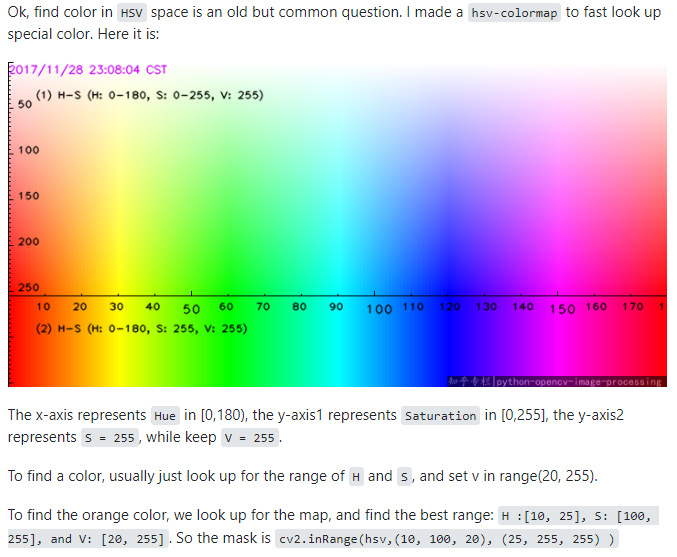

In [ ]:
# convert to hsv color space
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert rgb to hsv

mask = cv2.inRange(hsv, (100,90,90), (120,255,255)) # mask out the blue balls. range of hsv. from hsv1 to hsv2. 
# enter the link to see the hsv color space
# https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv/48367205#48367205
# we chose only h and s. v we made same as s

#mask = cv2.inRange(hsv, (0,0,180), (180,70,255)) # White

# display our mask
plt.imshow(mask,cmap='gray')

In [ ]:
# we have holes
# lets close them with the binary closing
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((5,5)))

# display our mask
plt.imshow(closed_mask,cmap='Blues')

In [ ]:
# lets label our blue balls, each one will get a different color
label_image = measure.label(closed_mask)
plt.imshow(label_image)

In [ ]:
# returns an RGB image where color-coded labels are painted over the image, using label2rgb
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image, image=img) # display the labels, abovee our original iamge (img)
plt.imshow(image_label_overlay)

In [ ]:
# lets get info about the blue balls (using measure)

props = measure.regionprops_table(label_image, img,
                                  properties= ['label',
                                               'area', 'equivalent_diameter', 
                                               'mean_intensity', 'solidity'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())

#### **TODO:** Segment the black, white, and green b

In [ ]:
# WHITE

mask = cv2.inRange(hsv, (0,0,180), (180,70,255)) # White

# display our mask
plt.imshow(mask,cmap='gray')

In [ ]:
# BLACK

mask = cv2.inRange(hsv, (0, 0, 0), (180, 255, 25)) # black

# display our mask
plt.imshow(mask,cmap='gray')

# lets close the holes with the binary closing
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((5,5)))

# display our mask
plt.imshow(closed_mask,cmap='gray')

In [ ]:
# GREEN

mask = cv2.inRange(hsv, (40,40,40), (70,255,255)) # Green

# display our mask
plt.imshow(mask,cmap='gray')

# lets close the holes with the binary closing
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((5,5)))

# display our mask
plt.imshow(closed_mask,cmap='gray')

In [ ]:
label_image = measure.label(closed_mask)
plt.imshow(label_image)

In [ ]:
# to deferintiate between the connected balls use watershed: https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
#k means
# https://www.youtube.com/watch?v=6CqRnx6Ic48


#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/watch?v=6CqRnx6Ic48



import numpy as np
import cv2

img = cv2.imread("images/BSE_Image.jpg")


# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
img2 = np.float32(img2)

#Define criteria, number of clusters and apply k-means
#When this criterion is satisfied, the algorithm iteration stops. 
#cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
#cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
#cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
#Max iterations, in this example 10. 
#Epsilon, required accuracy, in this example 1.0

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Number of clusters
k = 4

# Number of attempts, number of times algorithm is executed using different initial labelings.
#Algorithm return labels that yield best compactness.
#compactness : It is the sum of squared distance from each point to their corresponding centers.

attempts = 10

#other flags needed as inputs for K-means
#Specify how initial seeds are taken.
#Two options, cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS

ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

#cv2.kmeans outputs 2 parameters.
#1 COmpactness. 
#2 Labels: Label array.
#3 Center. the array of centers of clusters. For k=4 we will have 4 centers.
#For RGB image, we will have center for each image, so tota 4x3 = 12.
#Now convert center values from float32 back into uint8.
center = np.uint8(center) 

#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
res2 = res.reshape((img.shape)) #Reshape labels to the size of original image
cv2.imwrite("images/segmented.jpg", res2)


"""
#Now let us visualize the output result
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img2)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()
"""

### Voronoi (Week 6)

A Voronoi diagram divides the plane into separate regions where ​each region contains exactly one generating point (seed) and​ every point in a given region is closer to its seed than to any other. ​The regions around the edge of the cluster of points extend out to infinity. 

For more info, watch [here](https://www.youtube.com/watch?v=g5FnaNtcCzU).

In [ ]:
# what is

#https://youtu.be/g5FnaNtcCzU
"""
What is Voronoi?

A Voronoi diagram divides the plane into separate regions where ​
each region contains exactly one generating point (seed) and​
every point in a given region is closer to its seed than to any other. ​
The regions around the edge of the cluster of points extend out to infinity. 


"""
import sys
print("python version is: ", sys.version)

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt

points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])

plt.scatter(points[:,0], points[:,1])

#Create voronoi object
vor = Voronoi(points)

#Get voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices)

#Get voronoi regions
vor_regions = vor.regions
print(vor_regions) #Each sub-list contains the coordinates for the regions

#Use built in function to plot
fig = voronoi_plot_2d(vor)
plt.show()


#Let us generate a few random coordinates
coords = np.random.rand(10, 2) 
vor2 = Voronoi(coords)

plt.scatter(coords[:,0], coords[:,1])

fig2 = voronoi_plot_2d(vor2)
plt.show()

######################################################
# How can Voronoi help with image segmentation?
#What if we can find object centers and use them as seeds for Voronoi?
#Then threshold objects withing each voronoi region?
#This is an easy to segment objects.
##########################################

from skimage import io, filters

img = io.imread('temp.jpg')

plt.imshow(img, cmap='gray')
plt.axis('off')

#Step 1 - Gaussian blur to averagelocal intensity variations
img_blurred = filters.gaussian(img, sigma=5)
plt.imshow(img_blurred, cmap='gray')
plt.axis('off')

#Step 2: Find the points representing each object, to be used for Voronoi
from skimage.feature import peak_local_max
coordinates = peak_local_max(img_blurred, min_distance=20, 
                             exclude_border=False)

plt.imshow(img_blurred, cmap='gray')
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
plt.axis('off')

#Step 3: Vronoi regions
vor3 = Voronoi(coordinates)

fig3 = voronoi_plot_2d(vor3)
plt.axis('off')
plt.show()

#Step 4
#What if we can apply otsu threshold within each Voronoi region followed by watershed?

## This is exactly the approach for voronoi otsu based object segmentation... 

##########################################


In [ ]:
# vor  + otsu

# https://youtu.be/wtrKToZNgAg
"""
Object segmentation using voronoi and otsu

Step by step... 
Refer to the next tutorial for a single step function that does the job. 

Steps...
#Step 1: gaussian blur the image and detect maxima for each nuclei
#Step 2: threshold the input image after applying light gaussian blur (sigma=1)
#Step 3: Exclude maxima locations from the background, to make sure we only include the ones from nuclei
#Step 4: Separate maxima locations into labels using masked voronoi
#Step 5: Separate objects using watershed.

# For installation instructions of the pyclesperanto package, 
please refer to the following link
# https://github.com/clEsperanto/pyclesperanto_prototype

"""

import sys
print("python version is: ", sys.version)

from matplotlib import pyplot as plt
import pyclesperanto_prototype as cle
from skimage import io

img = io.imread("temp.jpg")
plt.imshow(img, cmap='gray')

# list names of all available OpenCL-devices
print("Available OpenCL devices:" + str(cle.available_device_names()))

# select a specific OpenCL / GPU device and see which one was chosen
device = cle.select_device('RTX')
print("Used GPU: ", device)

#Push the image to gpu memory
img_gpu = cle.push(img)
print("Image size in GPU: " + str(img_gpu.shape))

cle.imshow(img_gpu, color_map='gray')

# Step 1: heavy gaussian blur the image (e.g., sigma=12) and detect maxima for each nuclei
# heavy gaussian blurring assists in detecting maxima that reflects the objects.
#If objects are closer, you may want to decrease the amount of blurring.
img_gaussian = cle.gaussian_blur(img, sigma_x=9, sigma_y=9, sigma_z=12)
plt.imshow(img_gaussian, cmap='gray')

# Find out the maxima locations for each 'blob'
img_maxima_locations = cle.detect_maxima_box(img_gaussian, radius_x=0, radius_y=0, radius_z=0)

#Number of maxima locations (= number of objects)
#This number depend on the amount of Gaussian blur
number_of_maxima_locations = cle.sum_of_all_pixels(img_maxima_locations)
print("number of detected maxima locations", number_of_maxima_locations)

#View the blurred image and corresponding maxima locations
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img_gaussian, plot=axs[0], color_map='gray')
cle.imshow(img_maxima_locations, plot=axs[1], color_map='gray')

#Step 2: threshold the input image after applying light gaussian blur (sigma=1)
img_gaussian2 = cle.gaussian_blur(img, sigma_x=1, sigma_y=1, sigma_z=1)
img_thresh = cle.threshold_otsu(img_gaussian2)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img_gaussian2, plot=axs[0], color_map='gray')
cle.imshow(img_thresh, plot=axs[1], color_map='gray')


#Step 3: Exclude maxima locations from the background, to make sure we only include the ones from nuclei
# We can do this by using binary and operation
img_relevant_maxima = cle.binary_and(img_thresh, img_maxima_locations)

number_of_relevant_maxima_locations = cle.sum_of_all_pixels(img_relevant_maxima)
print("number of relevant maxima locations", number_of_relevant_maxima_locations)


fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(img_maxima_locations, plot=axs[0], color_map='gray')
cle.imshow(img_thresh, plot=axs[1], color_map='gray')
cle.imshow(img_relevant_maxima, plot=axs[2], color_map='gray')

#Step 4: Separate maxima locations into labels using masked voronoi
voronoi_separation = cle.masked_voronoi_labeling(img_relevant_maxima, img_thresh)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(img, plot=axs[0], color_map='gray')
cle.imshow(voronoi_separation, labels=True, plot=axs[1])


#cle.imshow(img_relevant_maxima, labels=True)

#Step 5: Separate objects using watershed.

#Not shown in this code..... tune to the next video

#__________________________________




In [ ]:
# otsu + vor + labeling

# https://youtu.be/evgRgDfVuEc
"""
Object segmentation and analysis using voronoi otsu labeling 
in the pyclesperanto library in python

We will be using a multichannel CZI (Zeiss) input image for this exercise.
This requires czi file library. 

pip install czifile

For standard images (e.g., jpg, tif, etc.) use skimage, cv2, or tifffile to read
input images. 

# For installation instructions of the pyclesperanto package, 
please refer to the following link
# https://github.com/clEsperanto/pyclesperanto_prototype

"""

import sys
print("python version is: ", sys.version)


import czifile #Only required to read czi files
print("czifile version is: ", czifile.__version__)

from matplotlib import pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle
from skimage import exposure, img_as_ubyte

#Read the input image
img = czifile.imread('Osteosarcoma_01.czi')

#Look at the dimensions.... multichannel and multidimensional
print(img.shape)  #6 dimensions
#Time series, scenes, channels, x, y, z, RGB
#IN this example (Osteosarcoma) we have 1 time series, 1 scene, 3 channels and each channel grey image
#size 1104 x 1376

#Let us extract only relevant pixels, all channels in x and y
img_3channel=img[0, 0, :, :, :, 0]
print(img_3channel.shape)

plt.imshow(img_3channel[0,:,:]) #Channel 1
plt.imshow(img_3channel[1,:,:]) #Channel 2
plt.imshow(img_3channel[2,:,:]) #Channel 3

#Our image of interest containing the objects (nuclei) is in channel 3
#So, let us extract that specific channel for analysis. 
DAPI = (img_3channel[2,:,:]) 
print(DAPI.dtype) #uint16. Need to convert to 8 bit

#Normalize then scale to 255 and convert to uint8 - using skimage
DAPI_8bit = img_as_ubyte(exposure.rescale_intensity(DAPI))
plt.imshow(DAPI_8bit, cmap='gray')

#Crop a small region for testing purposes
#DAPI_8bit = cle.crop(DAPI_8bit, start_x=0, start_y=0, width=256, height=256)
#plt.imshow(DAPI_8bit, cmap='gray')

# list names of all available OpenCL-devices
print("Available OpenCL devices:" + str(cle.available_device_names()))

# select a specific OpenCL / GPU device and see which one was chosen
device = cle.select_device('RTX')
print("Used GPU: ", device)

#Push the image to gpu memory
DAPI_gpu = cle.push(DAPI_8bit)
print("Image size in GPU: " + str(DAPI_gpu.shape))


cle.imshow(DAPI_gpu, color_map='gray')

############ voronoi_otsu_labeling library ##################
# voronoi_otsu_labeling(image, spot_sigma=some_number, outline_sigma=another_number)
#spot_sigma= depends on how close the detected objects can be. 
#Low number may divide large objects into multiple objects.
#outline_sigma = how precise the outline needs to be for the segmented objects (use a low number)
segmented = cle.voronoi_otsu_labeling(DAPI_gpu, spot_sigma=5, 
                                      outline_sigma=1)
cle.imshow(segmented, labels=True)

#Remove edge touching objects
segmented_excl_edges = cle.exclude_labels_on_edges(segmented)
cle.imshow(segmented_excl_edges, labels=True)

# Number of objects segmented?
#This will be the maximum label assigned to an object 9as each object is assigned unique label value)
num_objects = cle.maximum_of_all_pixels(segmented_excl_edges)
print("Total objects detected are: ", num_objects)

#Save segmented image to disk
# save image to disk
from skimage.io import imsave
segmented_array = cle.pull(segmented_excl_edges)
#This is a uint32 labeled image with each object given an integer value.
plt.imshow(segmented_array)  

imsave("result.tif", segmented_array)  #Open in imageJ for better visualization

###############################################################

#Useful plotting within cle

#Pixel count map - map by object size
pixel_count_map = cle.label_pixel_count_map(segmented_excl_edges)
cle.imshow(pixel_count_map, color_map='jet')

#Extension ratio map
#The extension ratio is a shape descriptor derived from the maximum distance 
# of pixels to their object's centroid divided by the average distance of 
#pixels to the centroid.
extension_ratio_map = cle.extension_ratio_map(segmented_excl_edges)
cle.imshow(extension_ratio_map, color_map='jet')

#Mean / minimum / maximum / standard-deviation intensity map
mean_intensity_map = cle.label_mean_intensity_map(DAPI_8bit, segmented_excl_edges)
cle.imshow(mean_intensity_map, color_map='jet')

minimum_intensity_map = cle.minimum_intensity_map(DAPI_8bit, segmented_excl_edges)
cle.imshow(minimum_intensity_map, color_map='jet')

maximum_intensity_map = cle.maximum_intensity_map(DAPI_8bit, segmented_excl_edges)
cle.imshow(maximum_intensity_map, color_map='jet')

stddev_intensity_map = cle.standard_deviation_intensity_map(DAPI_8bit, segmented_excl_edges)
cle.imshow(stddev_intensity_map, color_map='jet')

#Neighbor count maps
enlarged_labels = cle.extend_labeling_via_voronoi(segmented_excl_edges)
cle.imshow(enlarged_labels, labels=True)

touching_neighbor_count_map = cle.touching_neighbor_count_map(enlarged_labels)
cle.imshow(touching_neighbor_count_map, color_map='jet')

proximal_neighbor_count_map = cle.proximal_neighbor_count_map(segmented_excl_edges, max_distance=70)
cle.imshow(proximal_neighbor_count_map, color_map='jet')

#Distance to neighbor maps

n_nearest_neighbor_distance_map = cle.average_distance_of_n_closest_neighbors_map(segmented_excl_edges, n=3)
cle.imshow(n_nearest_neighbor_distance_map, color_map='jet')

################################################################

#Extract statistics and plot using seaborn / matplotlib
statistics = cle.statistics_of_labelled_pixels(DAPI_gpu, segmented_excl_edges) 

import pandas as pd
stats_table = pd.DataFrame(statistics)    

print(stats_table.describe())
print(stats_table.columns)

import seaborn as sns
sns.kdeplot(stats_table['area'], shade=True)

sns.kdeplot(stats_table['mean_intensity'], shade=True)

#Correlation plot
sns.pairplot(stats_table, x_vars=["mean_distance_to_centroid", "mean_intensity", "mean_distance_to_mass_center"], y_vars="area", size=6, aspect=0.75)

###############################################################################
#Draw bounding boxes around detected objects

#Convert cle object to numpy array
my_image=np.uint8(cle.pull(DAPI_8bit))
minx=stats_table['bbox_min_x'].values
miny=stats_table['bbox_min_y'].values
maxx=stats_table['bbox_max_x'].values
maxy=stats_table['bbox_max_y'].values

import cv2

for i in range (len(minx)):
    print(i)
    (x_min, y_min),(x_max,y_max) = (int(minx[i]),int(miny[i])), (int(maxx[i]), int(maxy[i]))
    cv2.rectangle(my_image,(x_min,y_min),(x_max,y_max),(255,255,255), 2) # add rectangle to image

cv2.imshow("Image", my_image)
cv2.waitKey(0) 
cv2.destroyAllWindows() 
#########################################################################


In [ ]:
# less then 10 lines of code

# https://youtu.be/pQfUMp51sI4
"""
Grain segmentation using < 10 lines of code in python
uses voronoi_labeling from the pyclesperanto library in python

# For installation instructions of the pyclesperanto package, 
please refer to the following link
# https://github.com/clEsperanto/pyclesperanto_prototype

"""

###### GRAIN SEGMENTATION IN LESS THAN 10 LINES OF CODE
from skimage import img_as_ubyte, io
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle

input_image_original = img_as_ubyte(io.imread("grains.jpg", as_gray=True))
input_image = np.invert(input_image_original)
binary = cle.binary_not(cle.threshold_otsu(input_image))
labels = cle.voronoi_labeling(binary)
cle.imshow(labels, labels=True)



########LET US HAVE A CLOSER LOOK############

from skimage import img_as_ubyte, io
import matplotlib.pyplot as plt
import numpy as np

input_image_original = img_as_ubyte(io.imread("grains.jpg", as_gray=True))
plt.imshow(input_image_original, cmap='gray')

input_image = np.invert(input_image_original)
plt.imshow(input_image, cmap='gray')

import pyclesperanto_prototype as cle

#Leverage GPU, if you have one
# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')
input_gpu = cle.push(input_image)


##########################################
#Straightforward segmentation without any processing

#Binarize (Thresholding using otsu)
binary = cle.binary_not(cle.threshold_otsu(input_gpu))
cle.imshow(binary)
           
#Use voronoi labeling method to generate labels
labels = cle.voronoi_labeling(binary)

#Visualize
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(input_gpu, plot=axs[0])
cle.imshow(binary, plot=axs[1])
cle.imshow(labels, plot=axs[2], labels=True)

#If we do not want to include the edge touching grains...
labeled_excl_edges = cle.exclude_labels_on_edges(labels)
cle.imshow(labeled_excl_edges, labels=True)

####################
#Segmentation with some image processing e.g., erosion, dilation

binary = cle.binary_not(cle.threshold_otsu(input_gpu))
cle.imshow(binary)

# binary closing: dilation (minimum) followed by erosion (maximum)
binary_dilated = cle.minimum_box(binary, radius_x=2, radius_y=2)
cle.imshow(binary_dilated)

binary_eroded = cle.maximum_box(binary_dilated, radius_x=2, radius_y=2)
cle.imshow(binary_eroded)

#Generate labels
labels = cle.voronoi_labeling(binary_eroded)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(input_gpu, plot=axs[0])
cle.imshow(binary, plot=axs[1])
cle.imshow(labels, plot=axs[2], labels=True)

#If we do not want to include the edge touching grains...
labeled_excl_edges = cle.exclude_labels_on_edges(labels)
cle.imshow(labeled_excl_edges, labels=True)


#######################################################
# Number of objects segmented?
#This will be the maximum label assigned to an object 9as each object is assigned unique label value)
num_objects = cle.maximum_of_all_pixels(labeled_excl_edges)
print("Total objects detected are: ", num_objects)

#Save segmented/labeled image to disk
# save image to disc
from skimage.io import imsave
labeled_array = cle.pull(labeled_excl_edges)
#This is a uint32 labeled image with each object given an integer value.
plt.imshow(labeled_array)  

imsave("labeled_image.tif", labeled_array)  #Open in imageJ for better visualization

#################################

#Extract statistics and plotting using seaborn / matplotlib
statistics = cle.statistics_of_labelled_pixels(input_gpu, labeled_excl_edges) 

import pandas as pd
stats_table = pd.DataFrame(statistics)    
print(stats_table.info())

import seaborn as sns
sns.kdeplot(stats_table['area'], shade=True)

sns.kdeplot(stats_table['mean_intensity'], shade=True)

#Map by grain size (pixel count)
pixel_count_map = cle.label_pixel_count_map(labeled_excl_edges)
cle.imshow(pixel_count_map, color_map='jet')

#Extension ratio map
#The extension ratio is a shape descriptor derived from the maximum distance 
# of pixels to their object's centroid divided by the average distance of 
#pixels to the centroid.
extension_ratio_map = cle.extension_ratio_map(labeled_excl_edges)
cle.imshow(extension_ratio_map, color_map='jet')

### **Using pyclesperanto package to segment based on Voronoi+Otsu - SHORT**

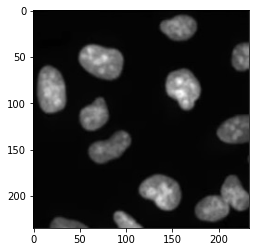

In [ ]:
# otsu + vor + labeling


from matplotlib import pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle
from skimage import exposure, img_as_ubyte

#Read the input image
# read an image of cells
img = io.imread(f'{images_path}/cells.jpg', as_gray = True)

# display it
plt.imshow(img, cmap='gray')

#Normalize then scale to 255 and convert to uint8 - using skimage
cells_8bit = img_as_ubyte(img)
plt.imshow(cells_8bit, cmap='gray')

In [ ]:
# preparing our GPU

# list names of all available GPU-devices
print("Available devices:" + str(cle.available_device_names()))

Available devices:['Tesla T4', 'cupy backend (experimental)']


Used GPU:  <Tesla T4 on Platform: NVIDIA CUDA (2 refs)>
Image size in GPU: (235, 233)


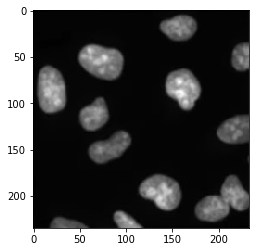

In [ ]:
# select a specific GPU device from the above
device = cle.select_device('Tesla T4')
print("Used GPU: ", device)

#Push the image to gpu memory
cells_gpu = cle.push(cells_8bit)
print("Image size in GPU: " + str(cells_gpu.shape))

# display
cle.imshow(cells_8bit, color_map='gray')

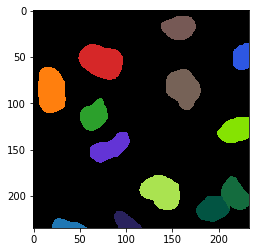

In [ ]:
############ voronoi_otsu_labeling library ##################
# voronoi_otsu_labeling(image, spot_sigma=some_number, outline_sigma=another_number)
#spot_sigma= depends on how close the detected objects can be. Low number may divide large objects into multiple objects.
#outline_sigma = how precise the outline needs to be for the segmented objects (use a low number)
segmented = cle.voronoi_otsu_labeling(cells_gpu, spot_sigma=5, 
                                      outline_sigma=1)
cle.imshow(segmented, labels=True)

**TODO:** Play with the spot_sigma value above and notice the differences.

In [ ]:
# Remove edge touching objects
segmented_excl_edges = cle.exclude_labels_on_edges(segmented)
cle.imshow(segmented_excl_edges, labels=True)

**TODO:** Why would you exclude objects that are the edges?

**Answer:** here

In [ ]:
# Number of objects segmented
# The maxmium intensity in a label image corresponds to the number of objects
num_objects = cle.maximum_of_all_pixels(segmented_excl_edges)
print("Total objects detected are: ", num_objects)

In [ ]:
# Save segmented image to disk
# save image to disk
import skimage.io
img_segmented_32bit_np = cle.pull(segmented_excl_edges) # pulls img from cle, convert to 32bit np array. each object has a diff int value
plt.imshow(img_segmented_32bit_np)  

io.imsave("result.tif", img_segmented_32bit_np)  # must save as tif

### **K-Means**

K-Means clustering is an unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors/values.

Click [here](https://qr.ae/pr7PZM) to read about what's the difference between Voronoi and K-means.

We going to use the cv2.kmeans() function, which takes a 2D array as input, and since our original image is 3D (width, height, and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):

Let's try to print the shape of the resulting pixel values:

If you look at the image, there are four primary colors. As a result, we going to use 4 clusters for this image:

labels array is the cluster label for each pixel which is either 0, 1, or 2, etc.., centers refer to the center points (each centroid's value).

cv2.KMEANS_RANDOM_CENTERS just indicates OpenCV to randomly assign the values of the clusters initially.

attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

In [ ]:
# function to segment using k-means

def segment_image_kmeans(img, k=3, attempts=10): 

    # Convert MxNx3 image into Kx3 where K=MxN
    pixel_values  = img.reshape((-1,3))  #-1 reshape means, in this case MxN

    #We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
    pixel_values = np.float32(pixel_values)

    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()
    
    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    
    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(img.shape)
    
    return segmented_image, labels, centers

In [ ]:
# running the function
# segment using kmeans
image =io.imread(f'{folder_path}/images/tomato.jpg')
k=3
attempts=10
segmented_kmeans, labels, centers = segment_image_kmeans(image, k, attempts)
plt.imshow(segmented_kmeans)

# AruCo Markers - Object Measurment (Week 7)

## I did not use this in the course so i wont include it here, but it shoul be rather simple.

# Streamlit Webapp - A Short Guide

1. Install Streamlit by running pip install streamlit in your command line.

2. Create a new Python file and import the following libraries: streamlit, pandas, and any other necessary libraries for your application.

3. Use the streamlit.title command to add a title to your app.

4. Use the streamlit.sidebar command to create a sidebar for your app. In the sidebar, you can add various widgets such as sliders, selectboxes, and text inputs.

5. Use the streamlit.text and streamlit.dataframe commands to display text and data in the main body of your app.

6. Use the streamlit.plotly_chart command to display interactive charts in your app.

7. Use the streamlit.cache command to cache data or computations to make your app run faster.

8. Use the streamlit.run command at the bottom of your script to run the app.

9. Use streamlit.write() to show output of your code.

10. Run your script using streamlit run my_script.py, then you can see your app on http://localhost:8501/

11. Finally, You can deploy your app on any hosting platform like Heroku, AWS, GCP or share with others via ngrok or other similar tools.

NOTE: I this course we ran the app through github. here is an example:

github: https://github.com/ImDonagi/BananaRipeningCalculator
streamlit: https://imdonagi-bananaripeningcalculator-app-60osp2.streamlit.app/

# Image Analysis using Pre-trained Machine Learning Models in Python (Lecture 10)

link to lecture colab: https://colab.research.google.com/drive/1wvLTxnmEz_elENm51eD34UrLZecau_er?authuser=1#scrollTo=0VOJvgb79Xhb

## Segmentation

### Random Forest Classifier (trainable)

### TensorFlow Hub

## Object Detection

### YOLOv5s

### Mask R-CNN